#import libraries 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

#upload and visualize data set 
chickweight=pd.read_csv('chickweight.csv')
chickweight.head(50)

In [3]:
#check  the how many row and columns are in the data set 
chickweight.shape

(578, 5)

In [4]:
#check what type of data each column has
chickweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rownum  578 non-null    int64
 1   weight  578 non-null    int64
 2   Time    578 non-null    int64
 3   Chick   578 non-null    int64
 4   Diet    578 non-null    int64
dtypes: int64(5)
memory usage: 22.7 KB


In [5]:
#check how many unique values are in each column 
chickweight.nunique()

rownum    578
weight    212
Time       12
Chick      50
Diet        4
dtype: int64

In [6]:
chickweight.columns

Index(['rownum', 'weight', 'Time', 'Chick', 'Diet'], dtype='object')

In [7]:
chickweight.index

RangeIndex(start=0, stop=578, step=1)

In [8]:
chickweight.values

array([[  1,  42,   0,   1,   1],
       [  2,  51,   2,   1,   1],
       [  3,  59,   4,   1,   1],
       ...,
       [576, 234,  18,  50,   4],
       [577, 264,  20,  50,   4],
       [578, 264,  21,  50,   4]], dtype=int64)

In [9]:
#check for missing values
chickweight.isna().sum()

rownum    0
weight    0
Time      0
Chick     0
Diet      0
dtype: int64

In [10]:
#check for duplicates 
chickweight.duplicated().sum()


0

In [11]:
chickweight.describe()

,rownum,weight,Time,Chick,Diet
count,578.000000,578.000000,578.000000,578.000000,578.000000
mean,289.500000,121.818339,10.717993,25.750865,2.235294
std,166.998503,71.071960,6.758400,14.568795,1.162678
min,1.000000,35.000000,0.000000,1.000000,1.000000
25%,145.250000,63.000000,4.000000,13.000000,1.000000
50%,289.500000,103.000000,10.000000,26.000000,2.000000
75%,433.750000,163.750000,16.000000,38.000000,3.000000
max,578.000000,373.000000,21.000000,50.000000,4.000000


In [12]:
chickweight.groupby('Diet')['Time'].agg(['min', 'max','mean', 'median'])

,min,max,mean,median
Diet,,,,
1,0,21,10.481818,10.0
2,0,21,10.916667,11.0
3,0,21,10.916667,11.0
4,0,21,10.754237,10.0


we can see that chicks on diet 2 and 3 live longer than chick on diet 1 and 4. All chicks started on diet from day 0 and they all lives a maximun of 21 days 

In [13]:
# checck from which diet the chicks  more chicks made to the last day which is 21 days
chickweight.loc[chickweight['Time']==21].groupby('Diet').count()

,rownum,weight,Time,Chick
Diet,,,,
1,16,16,16,16
2,10,10,10,10
3,10,10,10,10
4,9,9,9,9


as an average time, chicks on Diet 2 and 3 lives longer, howeever,higher number of chick from Diet 1 made it to the last day. However, if we check the number of chicks day 0 we can see that the number of chicks on diet one was the double of chicks of the other diets, whick make the probability  of chicks reaching 21 days higher, not because of the diet but because there are higher number of chicks 

In [14]:
# checck from which diet the chicks  more chicks made to the last day which is 21 days
chickweight.loc[chickweight['Time']==0].groupby('Diet').count()

,rownum,weight,Time,Chick
Diet,,,,
1,20,20,20,20
2,10,10,10,10
3,10,10,10,10
4,10,10,10,10


In [15]:
chickweight.groupby(['Diet','Chick'])[['Chick']].count()

Chick
Diet Chick       
1    1         12
     2         12
     3         12
     4         12
     5         12
     6         12
     7         12
     8         11
     9         12
     10        12
     11        12
     12        12
     13        12
     14        12
     15         8
     16         7
     17        12
     18         2
     19        12
     20        12
2    21        12
     22        12
     23        12
     24        12
     25        12
     26        12
     27        12
     28        12
     29        12
     30        12
3    31        12
     32        12
     33        12
     34        12
     35        12
     36        12
     37        12
     38        12
     39        12
     40        12
4    41        12
     42        12
     43        12
     44        10
     45        12
     46        12
     47        12
     48        12
     49        12
     50        12

as an average time, chicks on Diet 2 and 3 lives longer, howeever,higher number of chick from Diet 1 made it to the last day 

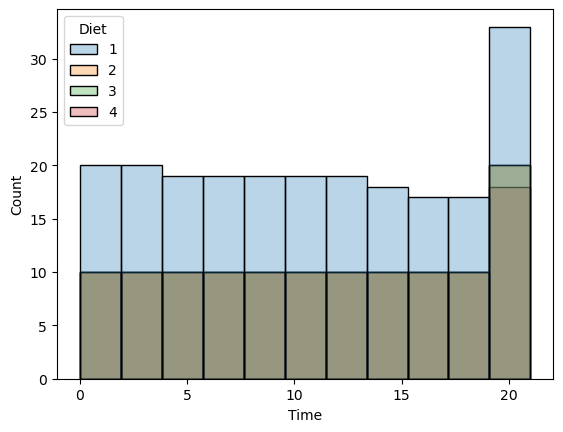

In [12]:
sns.histplot(x=chickweight['Time'], data=chickweight, hue='Diet', alpha=.3, palette="tab10");

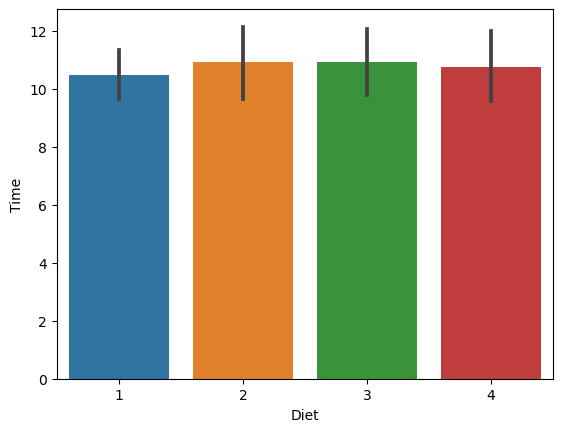

In [22]:
sns.barplot(x=chickweight['Diet'], y=chickweight['Time'], data=chickweight );

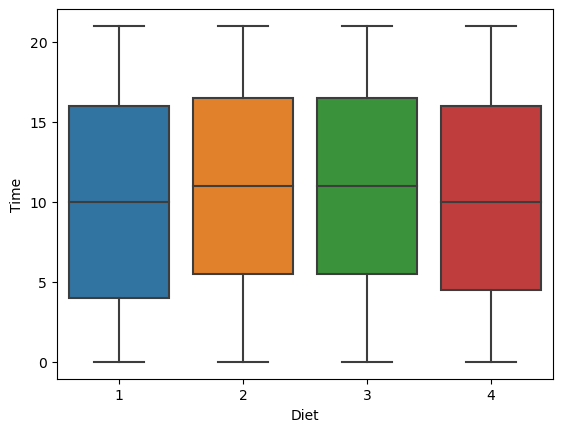

In [23]:
sns.boxplot(x=chickweight['Diet'], y=chickweight['Time'], data=chickweight);


In [26]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

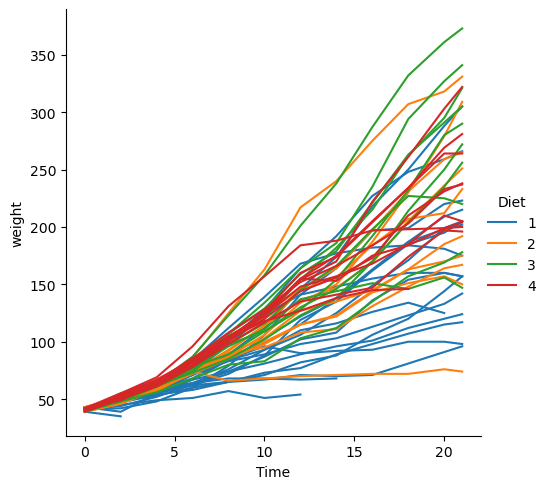

In [51]:
sns.relplot(x=chickweight['Time'], y=chickweight['weight'], hue='Diet', kind='line', data=chickweight,units='Chick',estimator=None,  palette="tab10") #palette=

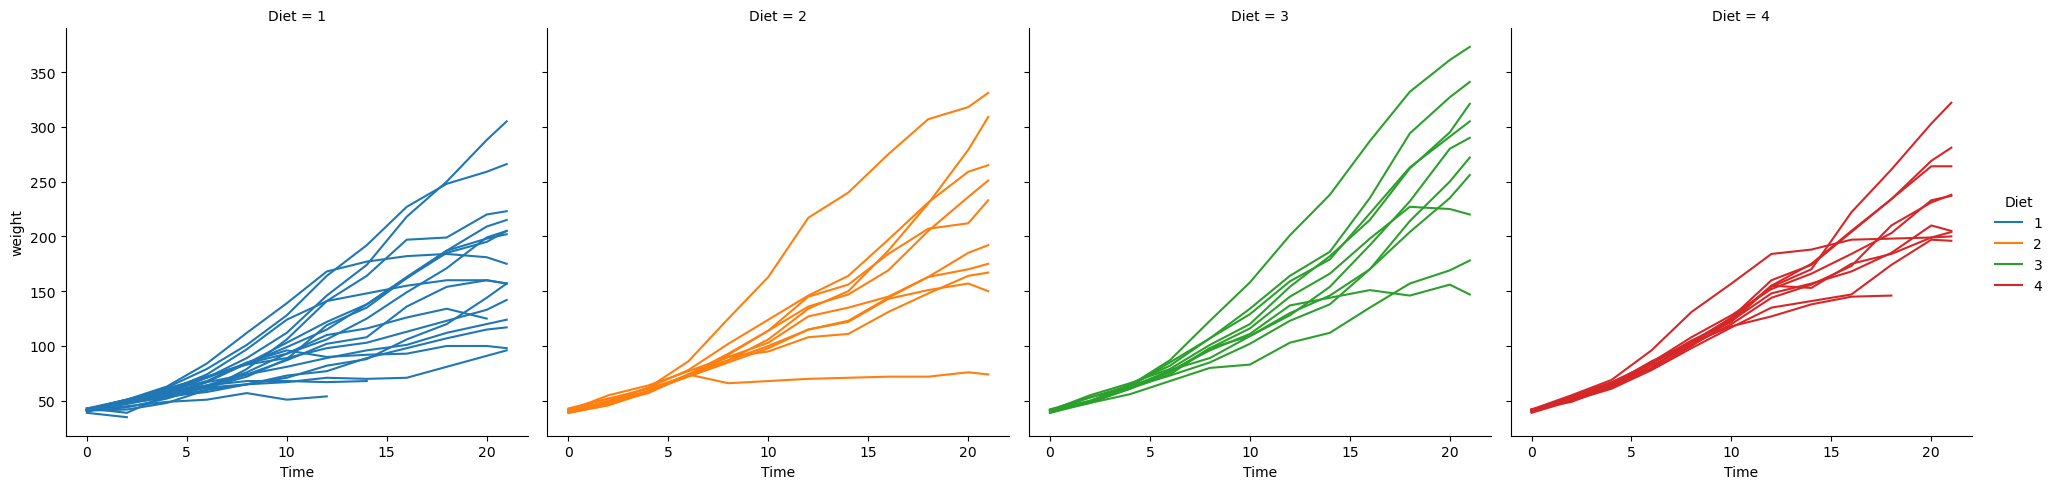

In [50]:
sns.relplot(x=chickweight['Time'], y=chickweight['weight'], hue='Diet', kind='line', data=chickweight,units='Chick',estimator=None,  palette="tab10", col="Diet")

In [52]:
#sns.lmplot(x=chickweight['Time'],y=chickweight['weight'],row="cut",col="color",  data=chickweight)

<AxesSubplot:xlabel='Time', ylabel='weight'>

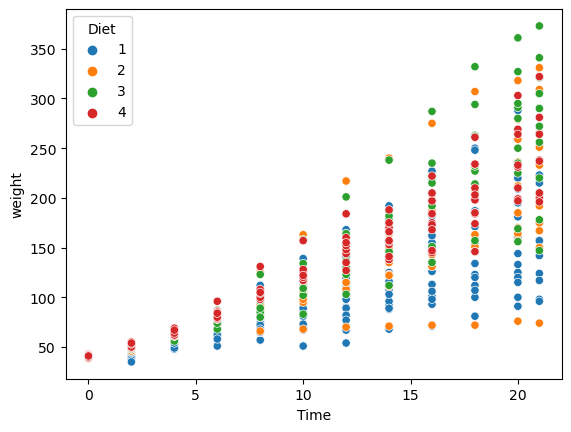

In [53]:
sns.scatterplot(x=chickweight['Time'], y=chickweight['weight'], hue='Diet', data=chickweight, palette="tab10") #palette=

No lineal correlation between Tiime(age of the chick) and weight, which means that not al chicks gained weight over time

As a conclusion we can say that diet 3 and 4 are the best. If we are interested on chicks living longer and gaining more weight diet 3 is the best. However if we don't mind the chiks living longer and we rather prefer chicks to grow faster, diet 4 can be better choice because chicks grow faster and with less variability untill 15 days. After 15 days aproximately growing rate starts to slow down and some of them they also day. 

In [13]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$